In [1]:
import tensorflow as tf

# mnist dataset containing 28 by 28 images of handwriten digits 0-9
mnist = tf.keras.datasets.mnist

# load the mnist dataset into arrays
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# normalize the pixel values from 0-255 to 0-1
training_images = tf.keras.utils.normalize(training_images, axis=1)
test_images = tf.keras.utils.normalize(test_images, axis=1)

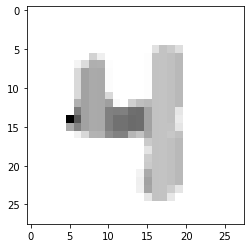

image corresponds to label: 4
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0. 

In [3]:
import matplotlib.pyplot as plt

# index of sample shown
sample_index = 58

# show one of the training images using greyscale colour map
plt.imshow(training_images[sample_index], cmap = plt.cm.binary)
plt.show()

# show corresponding label
print("image corresponds to label:", training_labels[sample_index])

# show image pixel value array
print(training_images[sample_index])

In [4]:
# building the architecture for the model
model = tf.keras.models.Sequential()

# flatten the image from a 2d array down to a 1d array of pixel values
model.add(tf.keras.layers.Flatten())

# first hidden layer of 128 using relu 
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

# second hidden layer of 128 using relu
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

# output layer of 10 (digits 0-9) using softmax
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

# getting lowest loss percentage as possible
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

# training the model
model.fit(training_images, training_labels, epochs=5)

W0804 00:02:50.271044 4424336832 deprecation.py:506] From /Users/Brian.Chan/Library/Python/3.7/lib/python/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/5
60000/60000 [==============================] - 6s 98us/sample - loss: 0.2645 - acc: 0.9225
Epoch 2/5
60000/60000 [==============================] - 6s 92us/sample - loss: 0.1074 - acc: 0.9669
Epoch 3/5
60000/60000 [==============================] - 6s 92us/sample - loss: 0.0747 - acc: 0.9766
Epoch 4/5
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0539 - acc: 0.9827
Epoch 5/5
60000/60000 [==============================] - 5s 88us/sample - loss: 0.0411 - acc: 0.9863


In [5]:
# validate the loss and accuracy of the model against the testing dataset
validation_loss, validation_accuracy = model.evaluate(test_images, test_labels)
print("validation loss: ", validation_loss)
print("validation accuracy", validation_accuracy)

10000/10000 [==============================] - 1s 54us/sample - loss: 0.0998 - acc: 0.9723
validation loss:  0.09984973484843504
validation accuracy 0.9723


In [6]:
# saving the model for future use. must be .model
model.save("mnist_dataset.model")

In [8]:
# load a model for prediction
new_model = tf.keras.models.load_model("mnist_dataset.model")

W0804 00:03:53.169738 4424336832 deprecation.py:506] From /Users/Brian.Chan/Library/Python/3.7/lib/python/site-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0804 00:03:53.173157 4424336832 deprecation.py:506] From /Users/Brian.Chan/Library/Python/3.7/lib/python/site-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0804 00:03:53.429909 4424336832 hdf5_format.py:263] Sequential models without an `input_shape` passed to the first layer cannot reload their optimizer state. As a result, your model iss

In [9]:
# prediction sample index
prediction_sample = 2666

# make a prediction with the model
predictions = new_model.predict(test_images)
print(predictions[prediction_sample])

[1.2966175e-11 1.1880263e-08 9.2598666e-06 2.7916929e-06 6.5491695e-11
 3.1904015e-09 6.2667203e-16 9.9998748e-01 4.6613934e-07 1.5348476e-08]


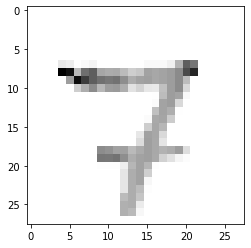

In [10]:
# show the prediction sample image using greyscale colour map
plt.imshow(test_images[prediction_sample], cmap = plt.cm.binary)
plt.show()

In [11]:
import numpy as np

print("model predicts image is a: ", np.argmax(predictions[prediction_sample]))

model predicts image is a:  7
